#**Intermediate Importing Data in Python**



1.   Importing data from the Internet
2.   Interacting with APIs to import data from the web




# **Importing data from the Internet**
## Importing flat files from the web

In [97]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url to file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

('winequality-red.csv', <http.client.HTTPMessage at 0x7f2f94d720f0>)

## opening and reading flat files from the web

In [98]:
# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

#Print the head of the DataFrame
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


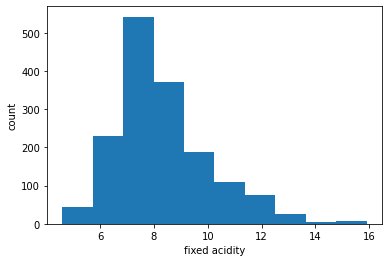

In [99]:
# Plot first column of df
import matplotlib.pyplot as plt
counts = df.loc[:, 'fixed acidity']

plt.hist(counts)
plt.xlabel('fixed acidity')
plt.ylabel('count')
plt.show()

## Importing non-flat files from web

In [100]:
# Read in first sheets of Excel file: xls
xls = pd.read_excel('http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls', sheet_names=0)

# print the sheetnames to the shell
print(xls.keys())

Index(['country', 1700], dtype='object')


In [101]:
# Print the head of the first sheet(using its name, NOT its index)
print(xls.head())

                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


# HTTP requests to import files from the web
## Performing HTTP requests in Python using urllib

In [102]:
# Import packages
from urllib.request import urlopen, Request

In [103]:
# Specify the url
url = 'https://assets.datacamp.com/production/repositories/488/datasets/b422ace2fceada7b569e0ba3e8d833fddc684c4d/latitude.xls'

# This packages the request: request
request = Request(url)

# Sends the request and caches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

<class 'http.client.HTTPResponse'>


## Printing HTTP request results in Python using urllib

In [104]:
# Extract the response:html
html = response.read()

# Print the html
print(html)

b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00E\x00\x00\x00\x01\x00\x00\x00\x00\x10\x00\x00G\x00\x00\x00\x01\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00H\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff

In [105]:
# Close the reponse
response.close()

## Performing HTTP requests in Python using requests

In [106]:
# Import package
import requests

# Packages the request, send the request and catch the response: r
r = requests.get('https://www.datacamp.com/')

# Extract the response: text
text = r.text

print(text)

<!DOCTYPE html><html><head><meta charSet="utf-8"/><meta http-equiv="x-ua-compatible" content="ie=edge"/><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"/><style data-href="https://static.datacamp.com/styles.e2a07324c1a3380e8489.css">/*! normalize.css v3.0.2 | MIT License | git.io/normalize */.dc-tac-lg-tal{text-align:center}.dc-mobile__header-img-container{margin:0 -15px;text-align:center}.dc-center-lg-split,.dc-center-sm-split{margin:0 auto;text-align:center}.dc-mobile__fundamentals-text,.dc-mobile__practice-text{padding-top:32px}@media screen and (min-width:768px){.dc-center-sm-split{margin:0;text-align:left;width:50%}.dc-maxw-320_sm{max-width:320px}.dc-mobile__practice-text{order:1;padding-top:0}.dc-mobile__fundamentals-text{padding-top:0}.dc-mobile__practice-img{padding-right:48px}.dc-mobile__fundamentals-img{padding-left:48px}}@media screen and (min-width:1200px){.dc-tac-lg-tal{text-align:left}.dc-maxw-480_lg{max-width:480px}.dc-center-lg-split

# Scraping the web in Python
## Parsing HTML WITH BeautifulSoup

In [107]:
# Import packages
import requests
from bs4 import BeautifulSoup

In [108]:
# Specify url: url 
url = 'https://www.datacamp.com/'


In [109]:
# Package the request, send the request and catch response: r
r = requests.get(url)

In [110]:
# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

print(pretty_soup)

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <style data-href="https://static.datacamp.com/styles.e2a07324c1a3380e8489.css">
   /*! normalize.css v3.0.2 | MIT License | git.io/normalize */.dc-tac-lg-tal{text-align:center}.dc-mobile__header-img-container{margin:0 -15px;text-align:center}.dc-center-lg-split,.dc-center-sm-split{margin:0 auto;text-align:center}.dc-mobile__fundamentals-text,.dc-mobile__practice-text{padding-top:32px}@media screen and (min-width:768px){.dc-center-sm-split{margin:0;text-align:left;width:50%}.dc-maxw-320_sm{max-width:320px}.dc-mobile__practice-text{order:1;padding-top:0}.dc-mobile__fundamentals-text{padding-top:0}.dc-mobile__practice-img{padding-right:48px}.dc-mobile__fundamentals-img{padding-left:48px}}@media screen and (min-width:1200px){.dc-tac-lg-tal{text-align:left}.dc-maxw-480_lg{max-width:480px}

## Turning a webpage into data using BeautifulSoup: getting the text

In [111]:
# Import packages
import requests
from bs4 import BeautifulSoup

In [112]:
# get the title of the webpage: datacamp_title
datacamp_title = soup.title

In [113]:
# print the title of webpage to the shell
print(datacamp_title)

<title data-react-helmet="true">Learn R, Python &amp; Data Science Online</title>


In [114]:
# Get webpage text
datacamp_text = soup.get_text()

In [115]:
# Print the text of webpage to the shell
print(datacamp_text)

/*! normalize.css v3.0.2 | MIT License | git.io/normalize */.dc-tac-lg-tal{text-align:center}.dc-mobile__header-img-container{margin:0 -15px;text-align:center}.dc-center-lg-split,.dc-center-sm-split{margin:0 auto;text-align:center}.dc-mobile__fundamentals-text,.dc-mobile__practice-text{padding-top:32px}@media screen and (min-width:768px){.dc-center-sm-split{margin:0;text-align:left;width:50%}.dc-maxw-320_sm{max-width:320px}.dc-mobile__practice-text{order:1;padding-top:0}.dc-mobile__fundamentals-text{padding-top:0}.dc-mobile__practice-img{padding-right:48px}.dc-mobile__fundamentals-img{padding-left:48px}}@media screen and (min-width:1200px){.dc-tac-lg-tal{text-align:left}.dc-maxw-480_lg{max-width:480px}.dc-center-lg-split{margin:0;width:50%}.dc-mobile__header-content{align-items:center;display:flex}.dc-mobile__header-img-container{margin:16px 0 0;width:50%}.dc-mobile__practice-text{padding-right:48px}.dc-mobile__practice-img{order:1;padding-right:0;text-align:center}.dc-mobile__fundamen

## Turning a webpage into data using BeautifulSoup: getting the hyperlinks

In [116]:
# Import packages
import requests
from bs4 import BeautifulSoup

In [117]:
url = 'https://www.datacamp.com/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
print(soup.title)

<title data-react-helmet="true">Learn R, Python &amp; Data Science Online</title>


In [118]:
# Find all 'a' tag (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
  print(link.get('href'))

/
/signal
/courses
/tracks/skill
/tracks/career
/instructors
/signal
/groups/business/reporting
/groups/business/integration
/groups/business/custom-learning-solutions
/groups/business/customer-success
/interactive-learning
/projects
/signal
/mobile
/pricing
/groups/business
/groups/education
/users/sign_up
/users/sign_in
#
/onboarding
/groups/business
/users/auth/linkedin
/users/auth/facebook
/users/auth/google_oauth2
/terms-of-use
/privacy-policy
/
/users/sign_in
/users/sign_up


#**Interacting with APIs to import data from the web**
# Introduction to APIs and Jsons
## Loading and exploring a JSON

In [119]:
# Load JSON: json_data
with open('http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network') as json_file:
  json_data = json.load(json_file)

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

FileNotFoundError: ignored

# APIs and interacting with the world wide web
## API requests

In [125]:
# Import requests package
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network'

# Package the request, send the request and catch the response:r
r = requests.get(url)

print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 171 wins & 183 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"605,667","imdbID":"tt1285

## JSON-from the web to Python

In [123]:
# Decode the JSON data into a dictionary: json_data
json_data = r.json()

In [124]:
# Print each key_value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

batchcomplete:  
warnings:  {'extracts': {'*': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Special:MyLanguage/Extension:TextExtracts#Caveats.'}}
query:  {'normalized': [{'from': 'pizza', 'to': 'Pizza'}], 'pages': {'24768': {'pageid': 24768, 'ns': 0, 'title': 'Pizza', 'extract': '<p class="mw-empty-elt">\n</p>\n\n<p><b>Pizza</b> (<small>Italian:\xa0</small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan:\xa0</small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.) which is then baked at a high temperature, traditionally in a wood-fired o

## Checking out the Wikipedia API

In [120]:
import requests
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'
r = requests.get(url)
json_data = r.json()

In [121]:
# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']

In [122]:
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.) which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta.
</p><p>In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Itali